# Plot DV with scale cuts

In [1]:
import sys
import twopoint as tp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import pickle as pl
from astropy.io import fits
import yaml
from matplotlib import ticker
import configparser
# import proplot as pplt
import fitsio as fio
%matplotlib inline

In [5]:
maindir='/global/homes/m/myamamot/DES/'
infile_mdet = maindir+'y6-cosmicshear/y6_cosmicshear/data/y6_mdetV5_blindcat_BLINDED.fits' 
infile_bfd = maindir+'y6-cosmicshear/y6_cosmicshear/data/y6_bfdV2_blindcat.fits' 
infile_bfd_marco = maindir+'y6-cosmicshear/y6_cosmicshear/data/2pt_y3dv_y6_cs_ggl_maglim_bfd__2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate_nosourcesreals_sompzmean.fits'
scfile=maindir+'y6-3x2pt-methods/y6_fiducial/scale_cuts/scales_1x2pt_minDMO_maxBM8_EE2_maxbin_chi2_3.25_cov1.45.ini'
covfile = maindir+'y6-3x2pt-methods/covariance/covmat_and_plots/desy3-cosmology/cov_simy6_l-desy3-1x2pt-cNG-mask'
savedir = maindir+'des-y6-analysis/cosmicshear_figures/'

[0.44632109 0.5726071  0.84998675 1.18785369]


(0.0, 3.5)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


<Figure size 1200x600 with 0 Axes>

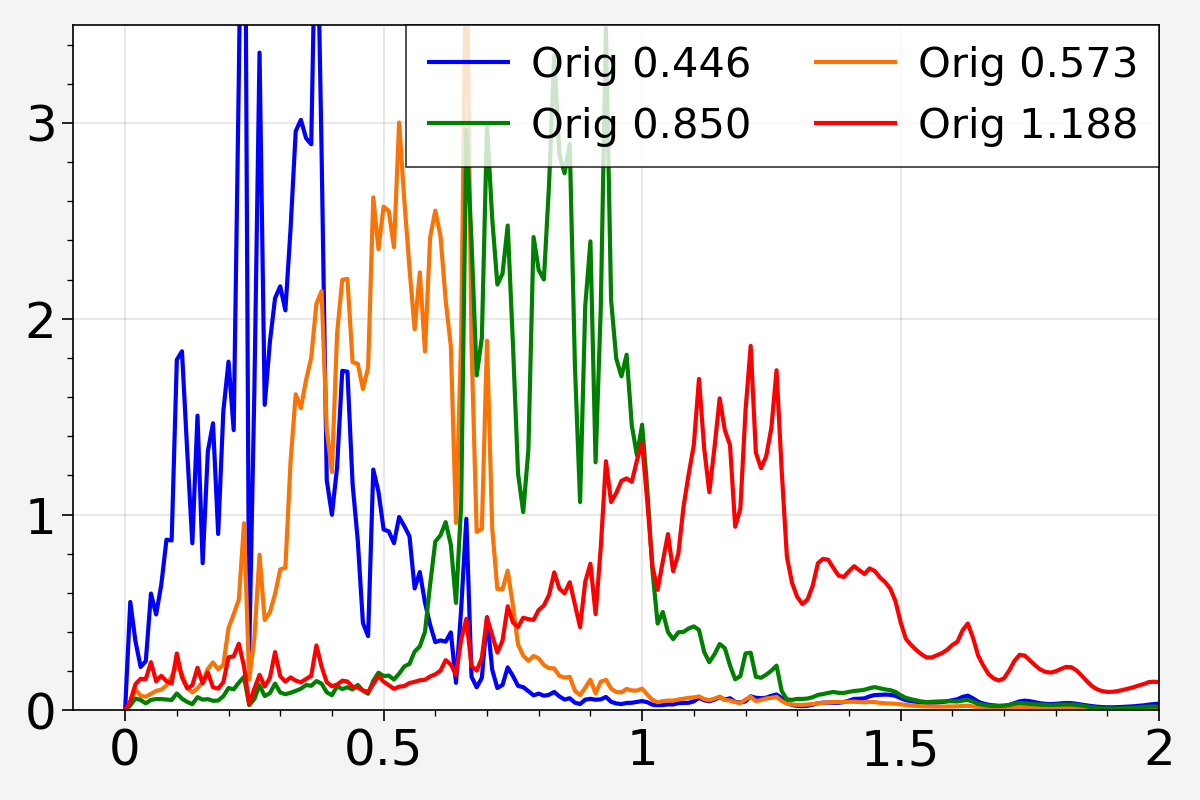

In [25]:
def get_mean(zmeans, hists):
    means = np.zeros(4)
    sigmas = np.zeros(4)
    
    plt.figure(figsize=(12,6))
    bins=['BIN1','BIN2','BIN3','BIN4']
    for i in range(4):
        means[i] = np.sum(hists[bins[i]]*zmeans)/np.sum(hists[bins[i]])        
    return means

nbins = 4

dat0 = fits.open(infile)

nz=dat0['nz_source'].data
nz_means = np.zeros((nbins))
nznorm = np.zeros((nbins,len(nz)))

for ibin in range(nbins):
    zmid = nz['Z_MID']
    nznorm[ibin,:]=nz['BIN%d'%(ibin+1)]/np.sum(nz['BIN%d'%(ibin+1)]) #normalise
    nz_means[ibin] = np.sum(nznorm*zmid)

meannz0=get_mean(dat0['nz_source'].data['Z_MID'], dat0['nz_source'].data)
print(meannz0)

matplotlib.rcParams.update({'font.size':18, 'legend.fontsize':'small'})
pplt.figure(figsize=(6,4))

plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN1'],color='blue',ls='-',label='Orig %.3f'%(meannz0[0]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN2'],color='orange',ls='-',label='Orig %.3f'%(meannz0[1]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN3'],color='green',ls='-',label='Orig %.3f'%(meannz0[2]))
plt.plot(dat0['nz_source'].data['Z_MID'],dat0['nz_source'].data['BIN4'],color='red',ls='-',label='Orig %.3f'%(meannz0[3]))


# plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[0,:],color='blue',ls='-',label='New %.3f'%(meannz1[0]))
# plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[1,:],color='orange',ls='-',label='New %.3f'%(meannz1[1]))
# plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[2,:],color='green',ls='-',label='New %.3f'%(meannz1[2]))
# plt.plot(dat1['nz_source'].data['Z_MID'],nznorm[3,:],color='red',ls='-',label='New %.3f'%(meannz1[3]))

# c=['blue','orange','green','red']
# for i in range(nbins):
#     plt.axvline(x=meannz0[i],ls='--',color=c[i])
#     plt.axvline(x=meannz1[i],ls='-',color=c[i])

plt.legend(fontsize=14,ncol=2)
plt.xlim((-0.1,2))
plt.ylim((0,3.5))

In [ ]:
nz['Z_HIGH']

In [3]:
log=False
matplotlib.rcParams["xtick.direction"]='in'
matplotlib.rcParams["ytick.direction"]='in'

def fake_theory(xi):
    return savgol_filter(xi, 11, 2)



def get_angle_range(xi,j,i):
    config = configparser.ConfigParser()
    config.read(scfile)
    scales = config['2pt_like']

    if xi == 'xip':
        name = 'angle_range_xip_'+str(j)+'_'+str(i)
    else:
        name = 'angle_range_xim_'+str(j)+'_'+str(i)
    return np.array(scales[name].split()).astype(float)

def get_angle_range_agg(xi,j,i):
    config = configparser.ConfigParser()
    config.read(scfile)
    scales = config['2pt_like']
    if xi == 'xip':
        name = 'angle_range_xip_'+str(j)+'_'+str(i)
    else:
        name = 'angle_range_xim_'+str(j)+'_'+str(i)
        #print(name, str(j), str(i), np.array(scales[name].split()).astype(float))
    return np.array(scales[name].split()).astype(float)

def get_params(xi,theta):
    if xi == 'xip' or xi == 'xim':
        #lims = [(-0.5,4.4),(0.,4.4),(0.,4.4),(0.,4.4)]#[(-0.4,1.2),(-0.4,1.6),(-0.6,3.),(-0.6,4.45)]
        lims = [(-0.5,4.5),(-0.5,4.5),(-0.5,4.5),(-0.5,4.5)]#[(-0.4,1.2),(-0.4,1.6),(-0.6,3.),(-0.6,4.45)]


        dlims = [(-1.5,1.5) for i in range(4)]
        tmult = theta
        dmult = 1e4
        dmult2 = 1e4
        lx = [0.05, 0.93]
    return lims, dlims,tmult,dmult,dmult2,lx

def set_axes(name,ax,dxi=False):
    if not dxi:
        if (name=='xim')&(i==1):
            plt.xlabel(r'$\theta$ [arcmin]')
        else:
            ax.set_xticklabels([])
        if i!=1:
            ax.set_yticklabels([])
        if (i==1)&(j==1):
            if name == 'xip':
                print("123")
                # plt.ylabel(r'$   10^{4}\theta\xi_{+}    $', labelpad=15) 
                plt.ylabel(r'$\theta\xi_{+}    $', labelpad=15) 
                x,y = ax.yaxis.label.get_position()
                print(x,y)
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                # plt.ylabel(r'$   10^{4}\theta\xi_{-}     $')
                plt.ylabel(r'$\theta\xi_{-}    $', labelpad=15) 
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")
    else:
        if (name=='xim')&(j==4): #&(j==4):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        elif (name=='xip')&(i==1)&(j==1):
            print(name,i,j)
            plt.xlabel(r'$\theta$ (arcmin)')
        if (name=='xim')&(j<3):
            ax.set_xticklabels([])
        if (name=='xip')&(j!=1):
        #else:
            ax.set_xticklabels([])
        
        if (name=='xip')&(i==1):
            print("yes!")
            #ax.set_yticklabels([])
        elif (name=='xim')&(i==1):
            print("yes!")
        else:
            ax.set_yticklabels([])
            
        if (i==1)&(j==1):
            if name == 'xip':
                print("Abc")
                plt.ylabel(r'$\delta\xi_{+}/\xi_{+}      $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x-.2, y)#-0.5
        if (i==1)&(j==4):
            if name == 'xim':
                plt.ylabel(r'$\delta\xi_{-}/\xi_{-}      $')
                x,y = ax.yaxis.label.get_position()
                ax.yaxis.set_label_coords(x+1.2, y)#+0.5
                ax.yaxis.set_label_position("right")

                
                
def get_axes(name,i,j,rows,cols,dxi=True):
    if dxi:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1)),i-1),rowspan=2)
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1),6-i),rowspan=2)
    else:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1))+2,i-1))
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1)+2,6-i))
    return ax

def get_axes_sim(name,i,j,rows,cols,dxi=False):
    if name == 'xip':
        ax = plt.subplot2grid((cols,rows+2), ((3-(j-1)),i-1))
    elif name=='xim':
        ax = plt.subplot2grid(( cols,rows+2), ((j-1),6-i))
    return ax


123
0 0.5


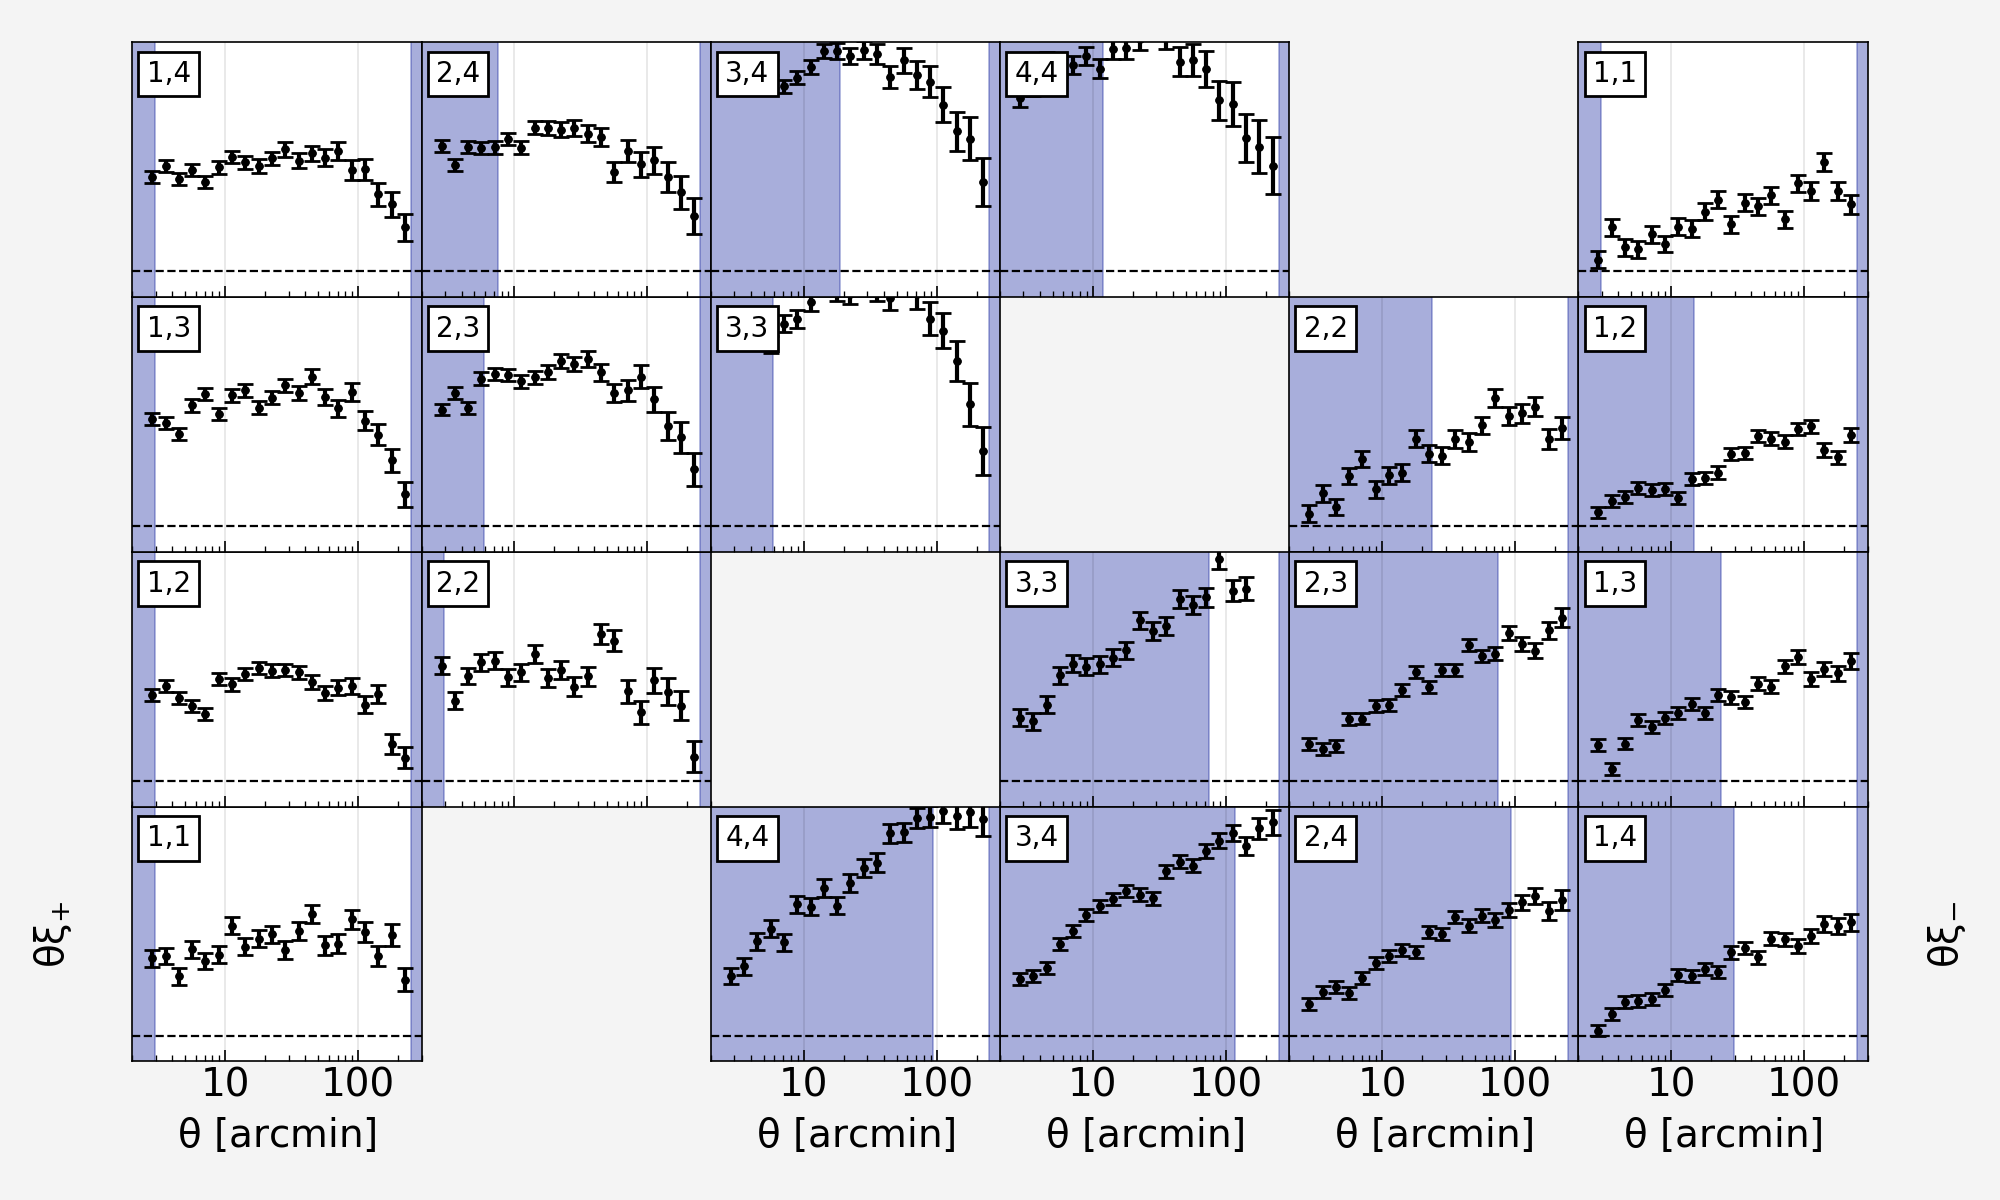

In [7]:
def plot_panel(name,i,j,rows,cols,theta,xi,err,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)
    ax = get_axes_sim(name,i,j,rows,cols, dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.axhline(y=0,ls='--',color='k',lw=0.8)

    from matplotlib.ticker import ScalarFormatter
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        axis.set_major_formatter(formatter)
    # ax.plot(ttheta,tmult*txi*dmult,ls='-',color = '#016e51',linewidth=3.)
    ax.errorbar(theta,tmult*xi*dmult,yerr=err*tmult*dmult,ls='',marker='.',color = 'k')
    ax.plot(theta,tmult*xi*dmult,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)

    plt.ylim(lims[j-1])
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    #plt.ticklabel_format(axis='x',style='plain',useOffset=False)    
    set_axes(name,ax,)
    # plt.yticks((1.0,3.0))
    plt.yticks([])
    plt.xscale('log')
    # ax.set_xlabel(r'$\theta$ [arcmin]')
    # ax.set_ylabel('')
    #ax.ticklabel_format(style='plain')
    plt.minorticks_on()
    if (name=='xim')&(j==4):
        plt.xlabel(r'$\theta$ [arcmin]')
    elif (name=='xip')&(i==1)&(j==1):
        plt.xlabel(r'$\theta$ [arcmin]')
    if (name=='xip')&(j!=1):
        ax.set_xticklabels([])
    if name == 'xim':
        ax.yaxis.tick_right()
    #ax.spines[axis].set_linewidth(0.5)
    
    """
    ax = get_axes(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    ax.axhline(y=0,ls='-',color='k')
    ax.errorbar(theta,(xi-txi)/txi,yerr=err/txi,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    plt.ylim(-1.0,1.0)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    #props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    #ax.text(0.03, 0.93, str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    plt.yticks((-1.0,1.0))
    plt.xscale('log')
    # plt.yscale('symlog',linthreshy=.01,linscale=0.01)
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    #plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
    """
        
#PLOT DATA VECTOR
matplotlib.rcParams.update({'font.size': 14, 'legend.fontsize':'small', 'lines.markersize': 4, 'axes.labelsize': 14, "text.usetex": False, "font.family": "serif", "font.serif": ["Times New Roman"]})
plt.figure(figsize=(10,6))

fits   = infile_bfd
# tfits  =  newfile
# y1fits = newfile

xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
#print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)

    plot_panel('xip',i,j,rowcols,rowcols,theta,xip,xiperr,notomo=False)
    plot_panel('xim',i,j,rowcols,rowcols,theta,xim,ximerr,notomo=False)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig(savedir+'xipm+mdet_blinded.pdf', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

In [54]:
fits_y6 = fio.FITS(infile)
C = fits_y6['COVMAT'].read()[:400,:400]
Cinv = np.linalg.inv(C)

xip = fits_y6['xip']['VALUE'].read()
xim = fits_y6['xim']['VALUE'].read()

D = np.hstack((xip,xim))
S = np.sqrt(np.dot(np.dot(D,Cinv),D))

print('S/N:',S)

S/N: 71.30310216169724


In [47]:
# Compute S/N of the measurement
cols = [('i','i8'), ('j','i8'), ('angle_i','f8'), ('angle_j','f8'), ('tomobin_1','i4'), ('tomobin_2','i4'), ('tomobin_3','i4'), ('tomobin_4','i4'), ('gauss','f8'), ('non-gauss','f8')]
cov = np.loadtxt(covfile, dtype=cols)

nsource = 4
xip_imin = 0
xip_imax = 199

xim_imin = 200
xim_imax = 399

# Compare DVs

123
0 0.5
xip 1 1
yes!
Abc
yes!
yes!
yes!
yes!
yes!
yes!
xim 1 4
yes!
xim 2 4
xim 3 4


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


xim 4 4


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


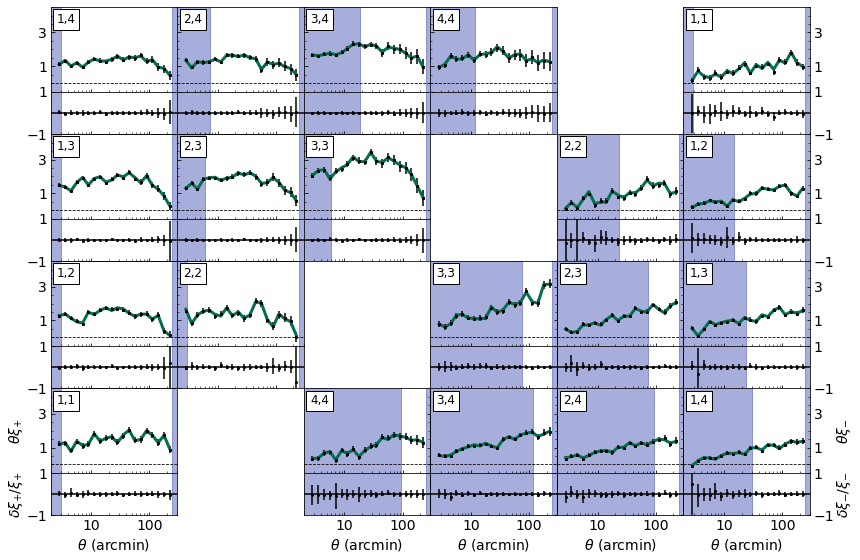

In [6]:
log=False
matplotlib.rcParams["xtick.direction"]='in'
matplotlib.rcParams["ytick.direction"]='in'

def get_axes_(name,i,j,rows,cols,dxi=False):
    if not dxi:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1)),i-1),rowspan=2)
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1),6-i),rowspan=2)
    else:
        if name == 'xip':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(3-(j-1))+2,i-1))
        elif name=='xim':
            ax = plt.subplot2grid(( cols*3,rows+2), (3*(j-1)+2,6-i))
    return ax



def plot_panel_(name,i,j,rows,cols,theta,xi,err,ttheta,txi,y1error,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)
    ax = get_axes_(name,i,j,rows,cols)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.axhline(y=0,ls='--',color='k',lw=0.8)

    from matplotlib.ticker import ScalarFormatter
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        axis.set_major_formatter(formatter)
    ax.plot(ttheta,tmult*txi*dmult,ls='-',color = '#016e51',linewidth=3.)
    ax.errorbar(theta,tmult*xi*dmult,yerr=err*tmult*dmult,ls='',marker='.',color = 'k')
    ax.plot(theta,tmult*xi*dmult,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    if txi is None:
        print('faking theory')
        txi = fake_theory(xi)

    plt.ylim(lims[j-1])
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    #plt.ticklabel_format(axis='x',style='plain',useOffset=False)    
    set_axes(name,ax,)
    plt.yticks((1.0,3.0))
    plt.xscale('log')
    ax.set_xlabel('')
    #ax.ticklabel_format(style='plain')
    plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
    #ax.spines[axis].set_linewidth(0.5)
    
    ax = get_axes_(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    ax.axhline(y=0,ls='-',color='k')
    ax.errorbar(theta,(xi-txi)/txi,yerr=err/txi,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    plt.ylim(-1.0,1.0)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    #props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    #ax.text(0.03, 0.93, str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    plt.yticks((-1.0,1.0))
    plt.xscale('log')
    # plt.yscale('symlog',linthreshy=.01,linscale=0.01)
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    #plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
        
#PLOT DATA VECTOR
matplotlib.rcParams.update({'font.size': 14, 'legend.fontsize':'small', 'lines.markersize': 4, 'axes.labelsize': 14, "text.usetex": False, "font.family": "serif", "font.serif": ["Times New Roman"]})
plt.figure(figsize=(12,8))

fits   = infile_bfd
tfits  =  infile_bfd_marco
y1fits = infile_bfd_marco

xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
txip_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xip')
txim_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xim')
y1_xip  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xip')
y1_xim  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xim')
pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
#print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)
    txip    = txip_.get_pair(i,j)[1]
    txim    = txim_.get_pair(i,j)[1]
    y1xiperror = y1_xip.get_error(i,j)
    y1ximerror = y1_xim.get_error(i,j)

    plot_panel_('xip',i,j,rowcols,rowcols,theta,xip,xiperr,theta,txip,y1xiperror,notomo=False)
    plot_panel_('xim',i,j,rowcols,rowcols,theta,xim,ximerr,theta,txim,y1ximerror,notomo=False)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig(dir+'DVcomp.pdf', dpi=150,bbox_inches='tight')
plt.show()
plt.close()

123
0 0.5
xip 1 1
yes!
Abc
yes!
yes!
yes!
yes!
yes!
yes!
xim 1 4
yes!
xim 2 4
xim 3 4


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman, Times New Roman


xim 4 4


<ipython-input-10-0680668e2dd5>:107: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


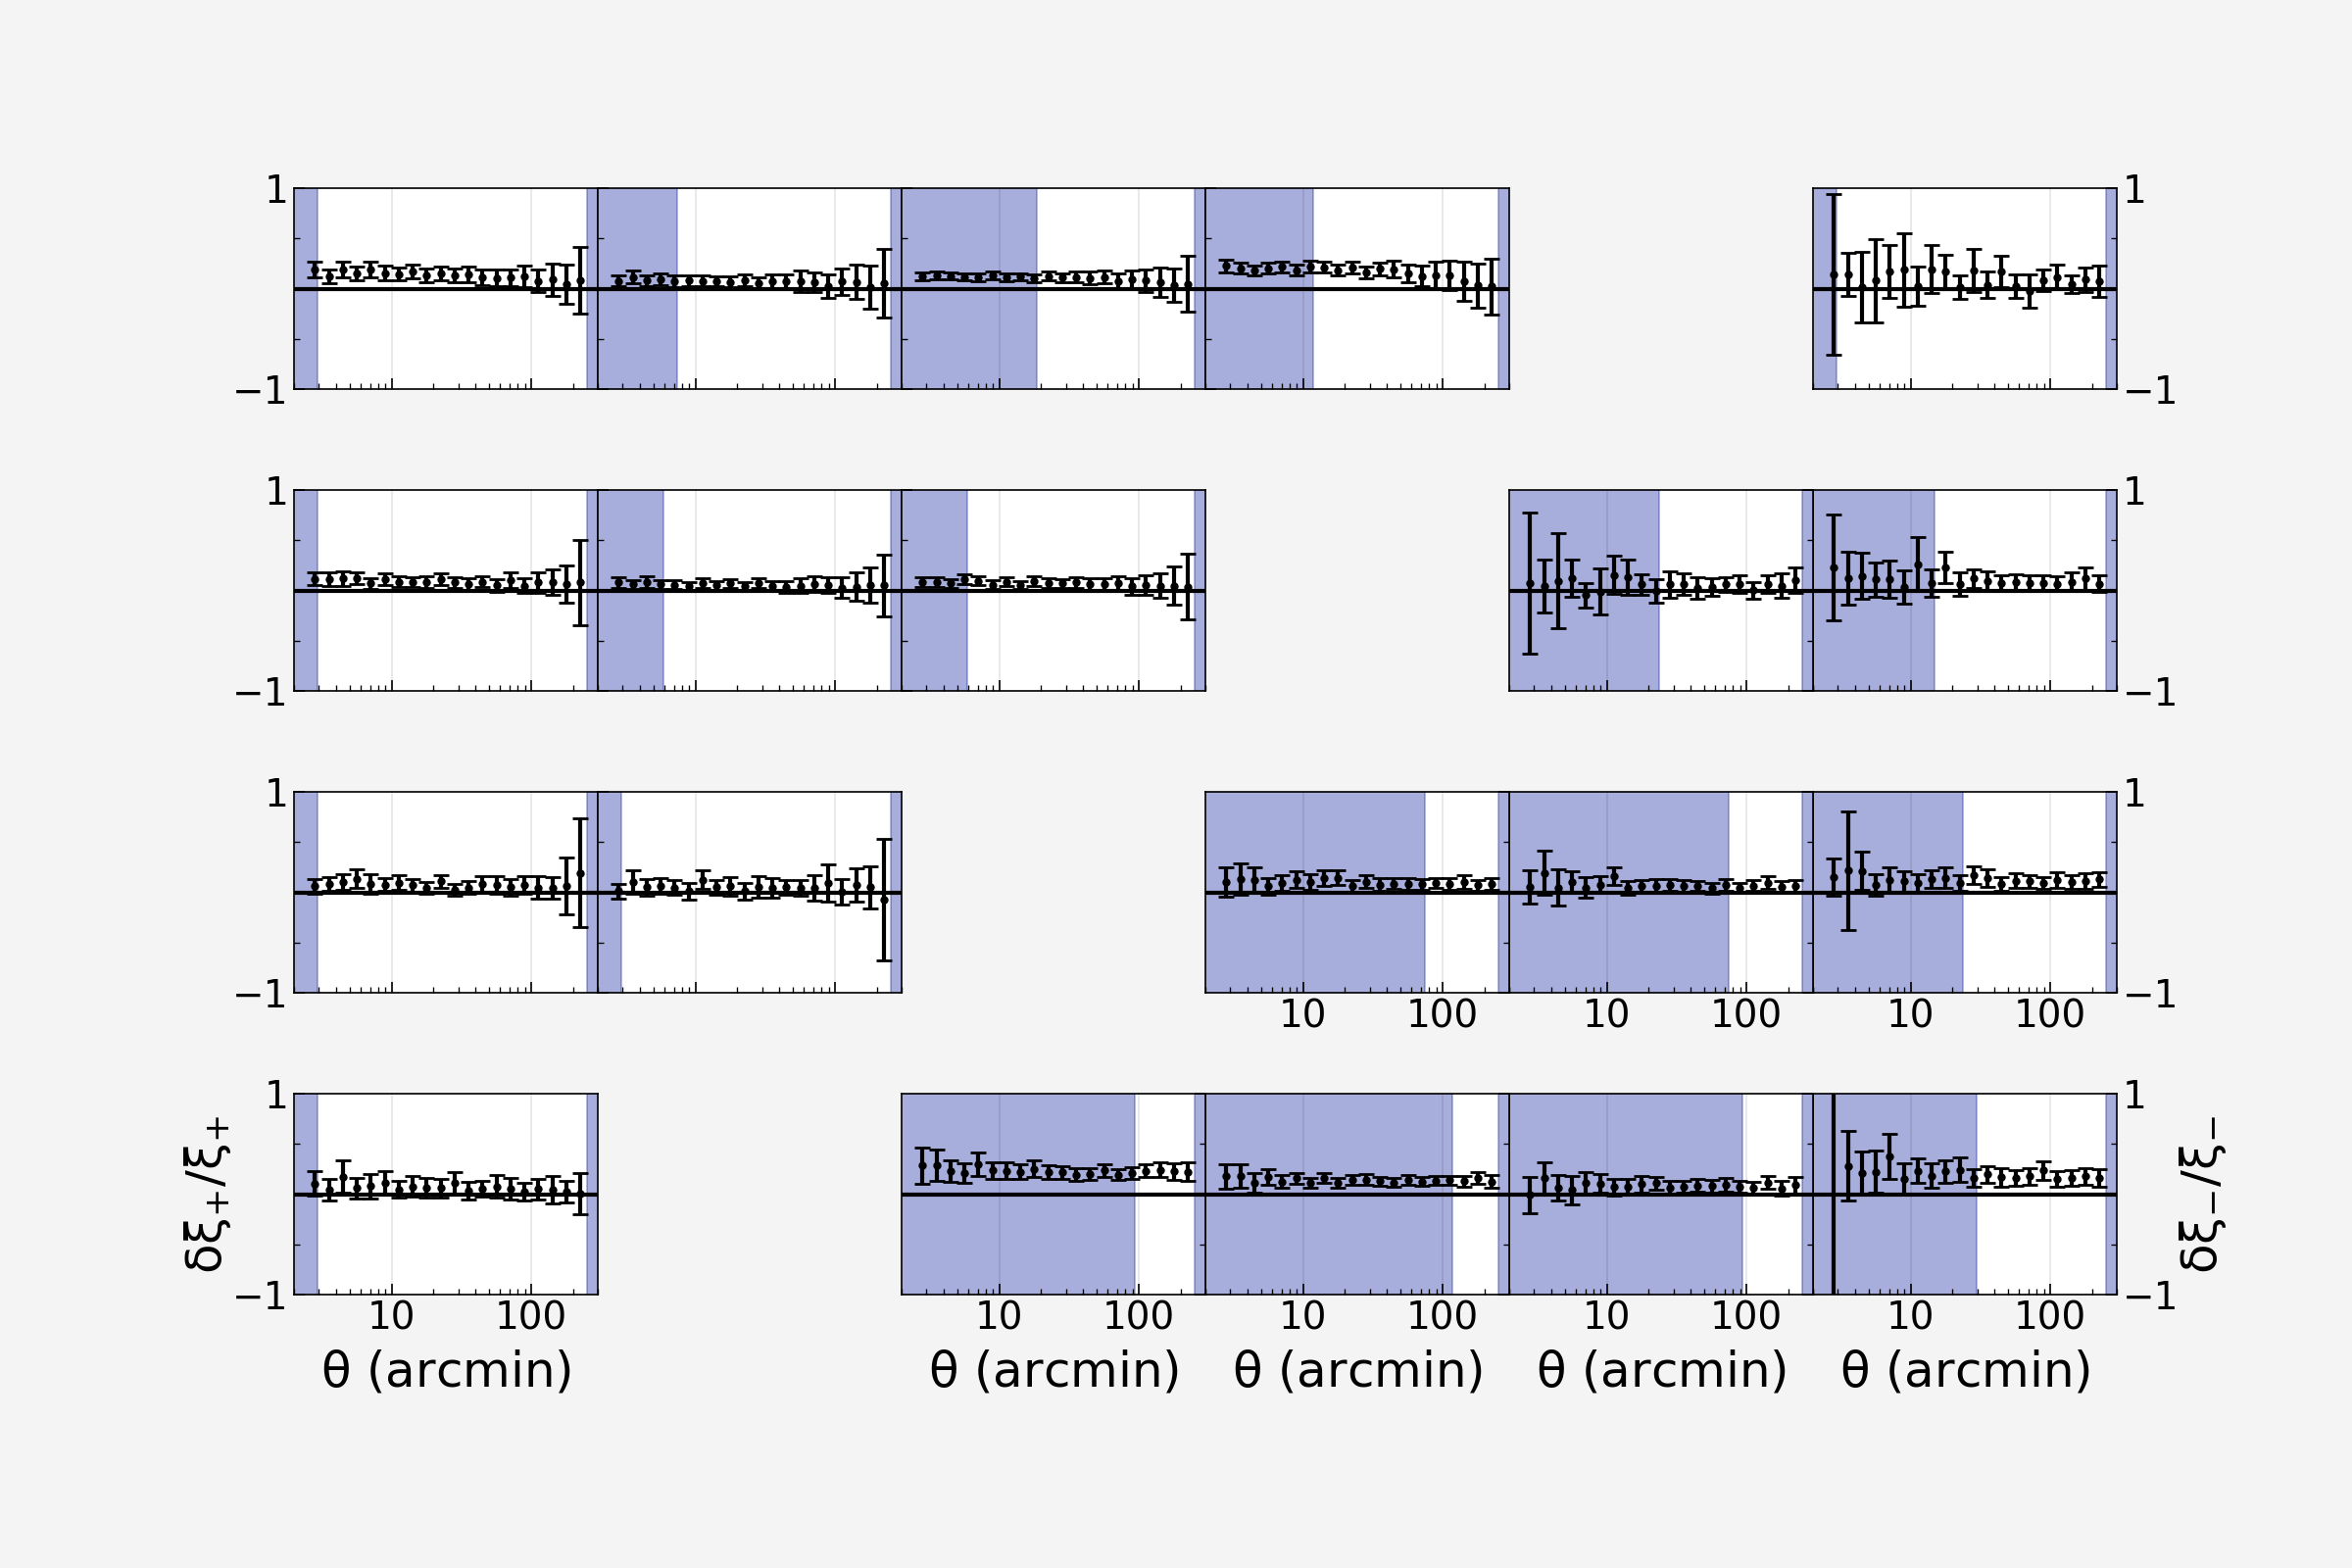

In [10]:
def plot_panel(name,i,j,rows,cols,theta,xi,err,ttheta,txi,y1error,notomo=False):
    lims, dlims,tmult,dmult,dmult2,lx = get_params(name,theta)
    ax = get_axes(name,i,j,rows,cols)
    tmin,tmax = get_angle_range(name,i,j)
    tmin2,tmax2 = get_angle_range_agg(name,i,j)
    ax.axhline(y=0,ls='--',color='k',lw=0.8)

    from matplotlib.ticker import ScalarFormatter
    for axis in [ax.xaxis, ax.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        axis.set_major_formatter(formatter)
    ax.plot(ttheta,tmult*txi*dmult,ls='-',color = '#016e51',linewidth=3.)
    ax.errorbar(theta,tmult*xi*dmult,yerr=err*tmult*dmult,ls='',marker='.',color = 'k')
    ax.plot(theta,tmult*xi*dmult,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    if txi is None:
        print('faking theory')
        txi = fake_theory(xi)

    plt.ylim(lims[j-1])
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    ax.text(lx[0], lx[1], str(i)+','+str(j), transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    #plt.ticklabel_format(axis='x',style='plain',useOffset=False)    
    set_axes(name,ax,)
    plt.yticks((1.0,3.0))
    plt.xscale('log')
    ax.set_xlabel('')
    #ax.ticklabel_format(style='plain')
    plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
    #ax.spines[axis].set_linewidth(0.5)
    
    ax = get_axes(name,i,j,rows,cols,dxi=True)
    tmin,tmax = get_angle_range(name,i,j)
    ax.axhline(y=0,ls='-',color='k')
    ax.errorbar(theta,(xi-txi)/txi,yerr=err/txi,ls='',marker='.',color = 'k')
    ax.set_rasterization_zorder(0)
    plt.ylim(-1.0,1.0)
    plt.fill_between([0.,tmin],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-1)
    plt.fill_between([tmax,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.15,zorder=-2)
    plt.fill_between([0.,tmin2],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-3)
    plt.fill_between([tmax2,1e3],-100*np.ones(2),100*np.ones(2),interpolate=True,color='#12239e',alpha=0.25,zorder=-4)
    #props = dict(boxstyle='square', lw=1.,facecolor='white', alpha=1.)
    #ax.text(0.03, 0.93, str(i)+','+str(j), transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.xlim((2,300))
    plt.yticks((-1.0,1.0))
    plt.xscale('log')
    # plt.yscale('symlog',linthreshy=.01,linscale=0.01)
    from matplotlib.ticker import FuncFormatter
    x=theta
    formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
    ax.xaxis.set_major_formatter(formatter)
    set_axes(name,ax,dxi=True)
    #plt.minorticks_on()
    if name == 'xim':
        ax.yaxis.tick_right()
        
#PLOT DATA VECTOR
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  #Palatino
})
plt.rcParams['axes.labelsize'] = 18
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

plt.figure(figsize=(12,8))

fits   = infile_bfd
tfits  =  infile_bfd_marco
y1fits = infile_bfd_marco

xip_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xip')
xim_   = tp.TwoPointFile.from_fits(fits).get_spectrum('xim')
txip_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xip')
txim_   = tp.TwoPointFile.from_fits(tfits,covmat_name=None).get_spectrum('xim')
y1_xip  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xip')
y1_xim  = tp.TwoPointFile.from_fits(y1fits).get_spectrum('xim')
pairs  = xip_.bin_pairs
rowcols = np.max(xip_.bin2)
#print(rowcols)

for k,(i,j) in enumerate(pairs):
    theta  = xip_.get_pair(i,j)[0]
    xip    = xip_.get_pair(i,j)[1]
    xim    = xim_.get_pair(i,j)[1]
    xiperr = xip_.get_error(i,j)
    ximerr = xim_.get_error(i,j)
    txip    = txip_.get_pair(i,j)[1]
    txim    = txim_.get_pair(i,j)[1]
    y1xiperror = y1_xip.get_error(i,j)
    y1ximerror = y1_xim.get_error(i,j)

    plot_panel('xip',i,j,rowcols,rowcols,theta,xip,xiperr,theta,txip,y1xiperror,notomo=False)
    plot_panel('xim',i,j,rowcols,rowcols,theta,xim,ximerr,theta,txim,y1ximerror,notomo=False)

plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)
# plt.savefig(dir+'DVcomp.pdf', dpi=150,bbox_inches='tight')
plt.show()
plt.close()

# Compare with SV

In [2]:
xi_sv = np.loadtxt('/pscratch/sd/m/myamamot/y6-cosmicshear/ngmix_xi_nontomo.dat')
xi_cov_sv = np.loadtxt('/pscratch/sd/m/myamamot/y6-cosmicshear/ngmix_xi_cov_nontomo.dat')
xi_cov = xi_cov_sv[:,2].reshape((30,30))


xi_y6 = np.loadtxt('/pscratch/sd/m/myamamot/y6-cosmicshear/measurements/xipm_y6_mdetV5b_blindcat_v5cuts_nontomo_0_0_0.000slop_2.5theta250.0.txt')
xi_cov_y6 = np.load('/pscratch/sd/m/myamamot/y6-cosmicshear/measurements/y6_mdetV5b_blindcat_v5cuts_nontomo_0_0_0.000slop_2.5theta250.0_200patches_BOOTcov.npy')

In [4]:
xi_y6

array([[2.82947237e+00, 2.83234286e-05, 6.05537657e-06, 9.19521033e-07,
        6.75997013e-07, 1.51723343e+10],
       [3.56215114e+00, 2.58740627e-05, 6.86860560e-06, 7.32603614e-07,
        1.06427548e-06, 2.39021862e+10],
       [4.48453263e+00, 1.92591016e-05, 6.89680250e-06, 5.83487940e-07,
        1.67679032e-06, 3.76800933e+10],
       [5.64576058e+00, 1.71832347e-05, 6.15468743e-06, 4.64607953e-07,
        2.64332665e-06, 5.94295523e+10],
       [7.10764016e+00, 1.30602864e-05, 6.18860449e-06, 3.69873586e-07,
        4.16900518e-06, 9.37711195e+10],
       [8.94827604e+00, 1.10514142e-05, 4.72750783e-06, 2.94316718e-07,
        6.58201040e-06, 1.48096868e+11],
       [1.12649448e+01, 9.75301378e-06, 5.11072164e-06, 2.34154398e-07,
        1.03962126e-05, 2.33975886e+11],
       [1.41817394e+01, 7.94544166e-06, 4.26929481e-06, 1.86362708e-07,
        1.64078129e-05, 3.69366679e+11],
       [1.78542310e+01, 6.23084301e-06, 3.64864902e-06, 1.48298200e-07,
        2.59064024e-05, 

Text(0, 0.5, '$\\xi_{+}$')

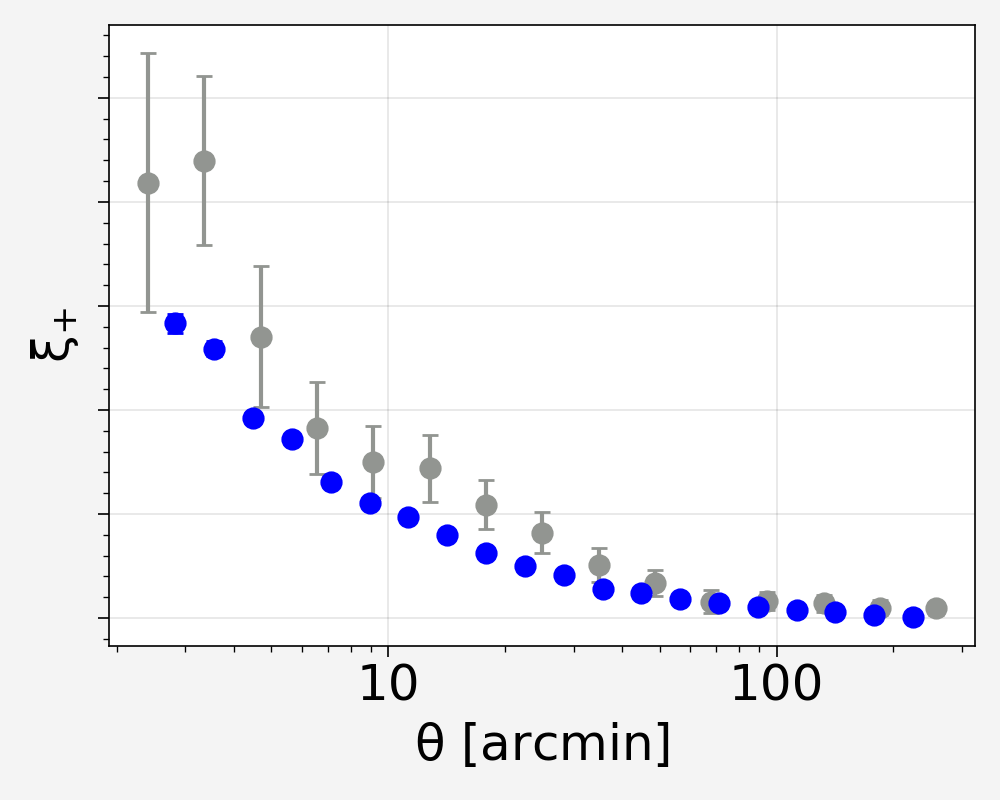

In [8]:
matplotlib.rcParams.update({'font.size':18, 'legend.fontsize':'medium', 'lines.markersize':7, "text.usetex": False, "font.family": "serif", "font.serif": ["Times New Roman"]})
fig,ax = pplt.subplots(figsize=(5,4))

ax.errorbar(xi_sv[:15,0], xi_sv[:15,1], yerr=np.sqrt(np.diag(xi_cov[:15, :15])), fmt='o', c='grey', label='SV')
ax.errorbar(xi_y6[:,0], xi_y6[:,1], yerr=xi_y6[:,3], fmt='o', c='b', label='Y6')
ax.set_xscale('log')
#ax.set_yscale('log')
# ax.set_ylim(1e-7,1e-4)
#ax.format(yticklabels=['','$10^{-7}$', '$10^{-6}$', '$10^{-5}$', '$10^{-4}$',])
ax.format(yticklabels=[])
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'$\xi_{+}$')

In [9]:
xi_sv[:15,0]

array([  2.40669,   3.36145,   4.69478,   6.55678,   9.15731,  12.7885 ,
        17.8592 ,  24.9394 ,  34.8238 ,  48.6226 ,  67.876  ,  94.7376 ,
       132.199  , 184.387  , 256.82   ])

In [10]:
(np.log(275)-np.log(2))/15

0.3282415944737751

In [22]:
d = np.logspace(np.log10(1), np.log10(300), 15)

In [23]:
[(d[i]+d[i+1])/2. for i in range(len(d)-1)]

[1.2514623681768322,
 1.8808537497486981,
 2.8267816259608636,
 4.248440029926614,
 6.385085611891809,
 9.596303109848076,
 14.42252132133827,
 21.67596405442742,
 32.57734256171184,
 48.96129398066377,
 73.58513984742336,
 110.59292690473633,
 166.21284551088095,
 249.8053970180331]

In [3]:
# redshift distribution
nz_y3 = np.loadtxt('/pscratch/sd/m/myamamot/sample_variance/Y3_nontomographic_nz.txt')
nz_sv = np.loadtxt('/pscratch/sd/m/myamamot/y6-cosmicshear/ngmix_skynet_pz.dat')

f = tp.TwoPointFile.from_fits('/pscratch/sd/m/myamamot/y6-cosmicshear/2pt_modal_even_SOMF_y3_smooth_1bin.fits')
bins = f.kernels[0].z
nz_y3_new = f.kernels[0].nzs[0]

<a list of 1 Line2D objects>

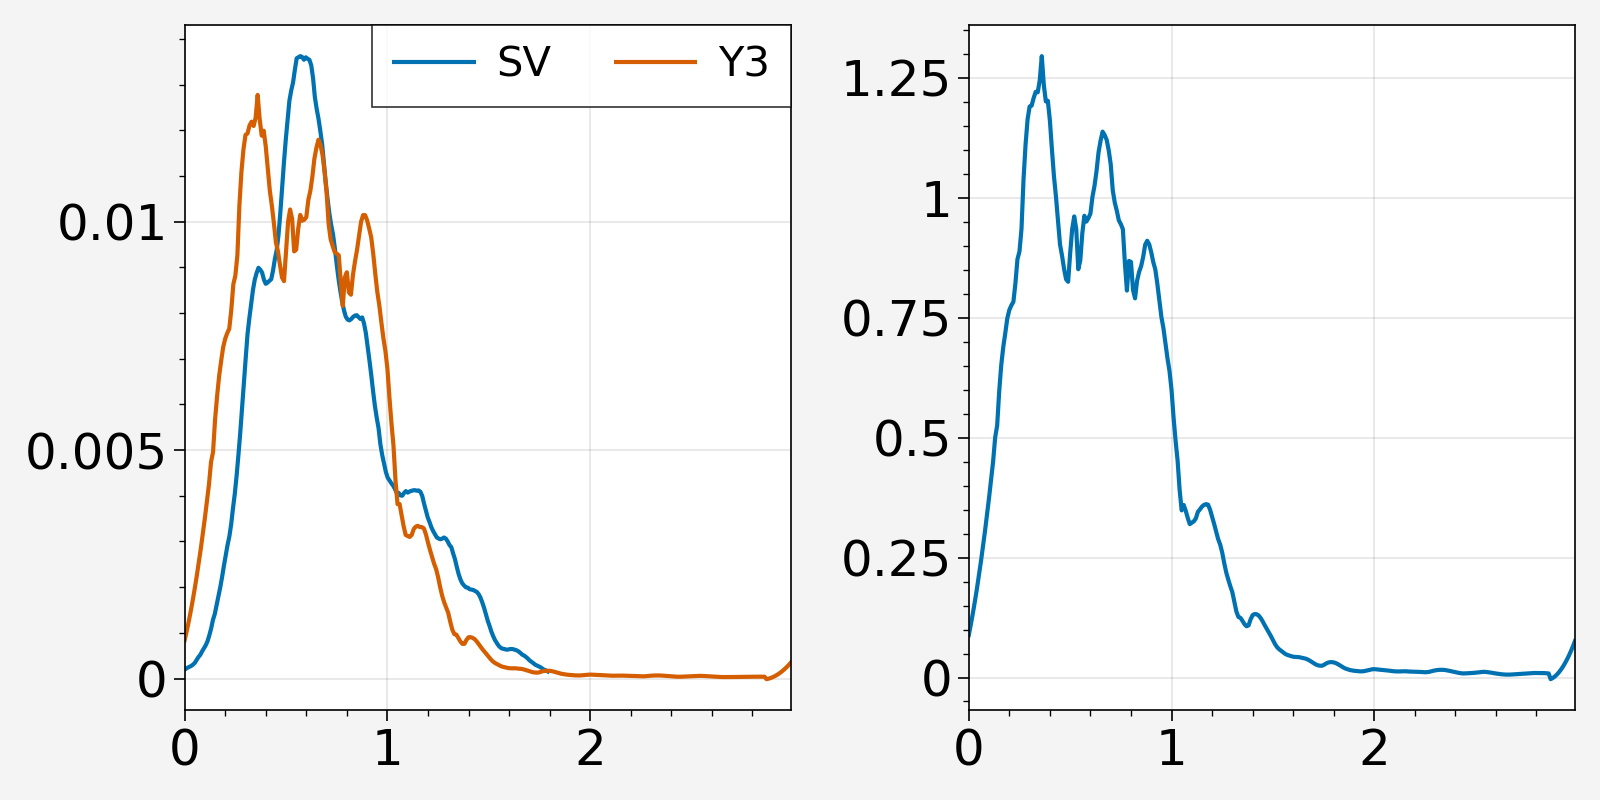

In [19]:
matplotlib.rcParams.update({'font.size':18, 'legend.fontsize':'small', 'lines.markersize':7, "text.usetex": False, "font.family": "serif", "font.serif": ["Times New Roman"]})
fig,ax = pplt.subplots(nrows=1, ncols=2, figsize=(8,4), sharex=False, sharey=False)

ax[0].plot(nz_sv[:,0], nz_sv[:,5], label='SV')
ax[0].plot(nz_y3[:,0], nz_y3[:,1]/np.sum(nz_y3[:,1]), label='Y3')
# ax.plot(bins, nz_y3_new, label='Y3 new')
ax[0].legend()

ax[1].plot(bins, nz_y3_new, label='Y3 new')

In [21]:
d_sv = np.zeros((len(nz_sv[:,0]), 2))
d_sv[:,0] = nz_sv[:,0]
d_sv[:,1] = nz_sv[:,5]

In [26]:
np.savetxt('/pscratch/sd/m/myamamot/y6-cosmicshear/SV_nontomographic_nz.txt', d_sv)